# Predicting the Presence of Diabetes

# Problem Definition
> How well can we predict whether there's a presence of diabetes

We'll try to get an accuracy of over 95%, since this is important

# Data

The data is taken from kaggle: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


*All features are in numbers: no conversions necessary*

In [5]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

*Data doesn't contain null values: no imputation/samping necessary*

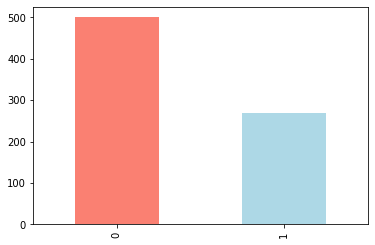

In [10]:
data['Outcome'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

*Data is balanced enough*

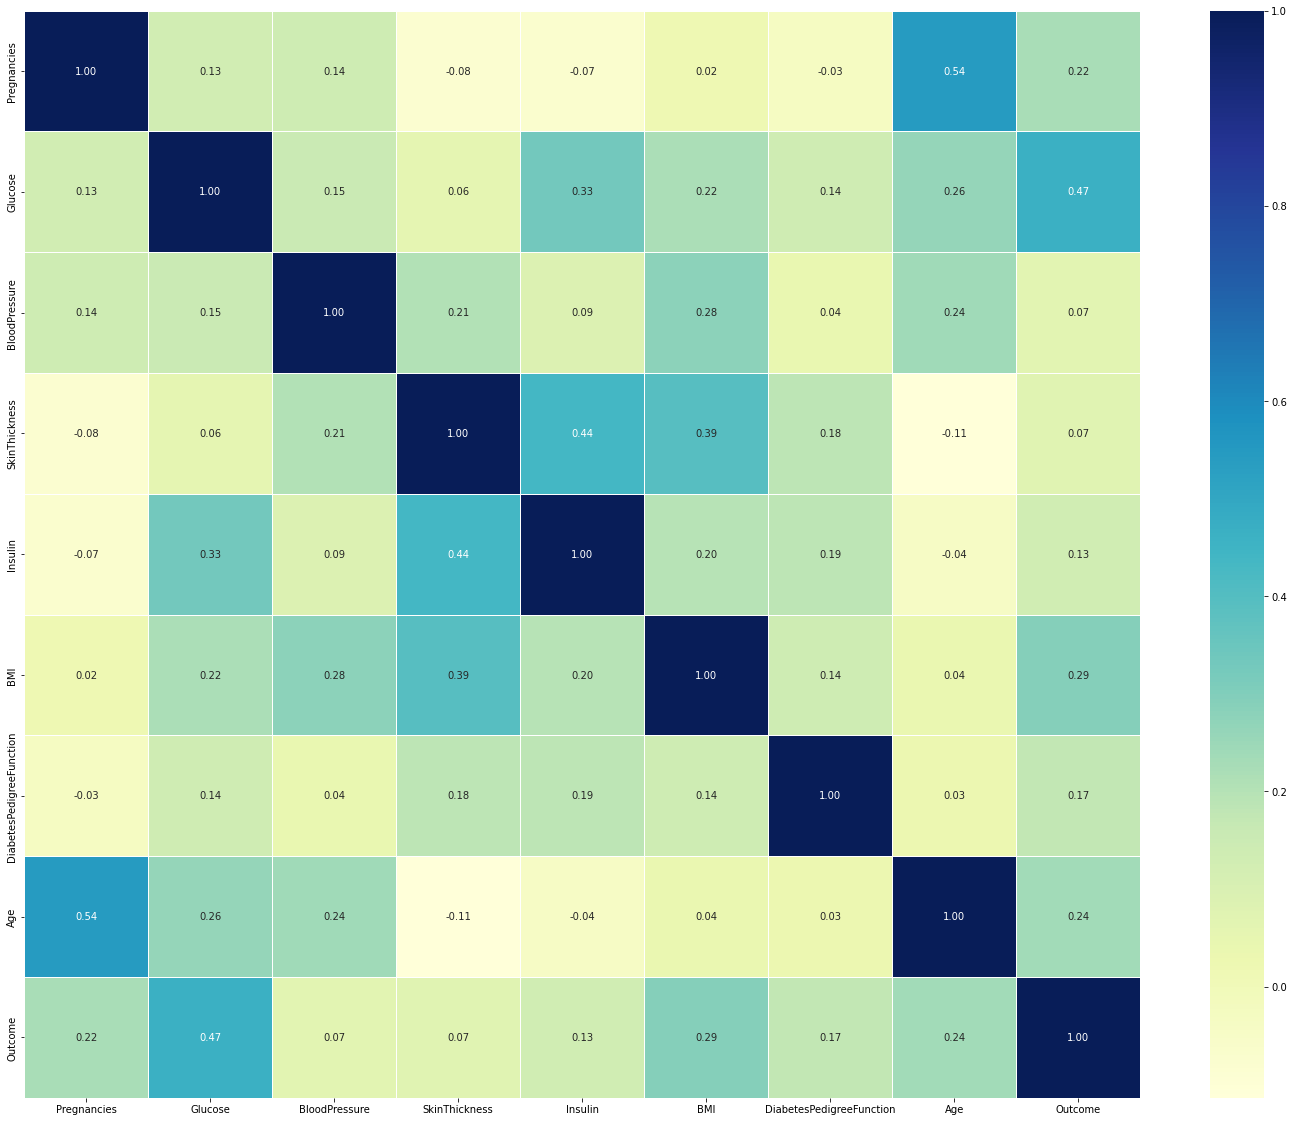

In [11]:
# Plot correlation matrix
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(
    corr_matrix,
    annot=True,
    linewidths=0.5,
    fmt=".2f",
    cmap="YlGnBu"
);

*Data doesn't contain very correlated features - going ahead with all features*

# Modelling

In [13]:
X, y = data.drop('Outcome', axis=1), data['Outcome']
X.shape, y.shape

((768, 8), (768,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((460, 8), (460,), (116, 8), (116,))

In [22]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': LinearSVC(max_iter=1000000)
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [23]:
fit_and_score(
    models,
    X_train,
    X_test,
    y_train,
    y_test
)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


{'Logistic Regression': 0.796875,
 'KNN': 0.765625,
 'Random Forest': 0.7760416666666666,
 'SVM': 0.796875}

*Logistic & SVM got same results - tuning them both*

In [31]:
# tune hyperparameters
log_reg_grid = {
    'C': np.logspace(-4, 4, 20),
    'solver': ['liblinear']
}

svc_grid = {
    'C': [0.1, 1, 10], 
}

rf_grid = {
    'n_estimators': np.arange(10, 20, 10),
    'max_depth': [None, 3, 5],
    'min_samples_split': np.arange(10, 50, 10),
    'min_samples_leaf': np.arange(10, 50, 10)
}

In [26]:
# Tune Logistic Regression
np.random.seed(42)

log_gs = GridSearchCV(
    LogisticRegression(max_iter=1000),
    log_reg_grid,
    verbose=1
)

log_gs.fit(X_train, y_train)
log_gs.score(X_val, y_val), log_gs.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


(0.7068965517241379, {'C': 29.763514416313132, 'solver': 'liblinear'})

In [27]:
# Tune SVM
np.random.seed(42)

sv_gs = GridSearchCV(
    LinearSVC(max_iter=1000000),
    svc_grid
)

sv_gs.fit(X_train, y_train)
sv_gs.score(X_val, y_val), sv_gs.best_params_

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iteration

(0.7068965517241379, {'C': 29.763514416313132, 'solver': 'liblinear'})

In [32]:
# tune Random Forest
np.random.seed(42)

rf_gs = GridSearchCV(
    RandomForestClassifier(),
    rf_grid
)

rf_gs.fit(X_train, y_train)
rf_gs.score(X_val, y_val), rf_gs.best_params_

(0.6896551724137931,
 {'max_depth': 5,
  'min_samples_leaf': 10,
  'min_samples_split': 30,
  'n_estimators': 10})

*SVM and logistic Regression produced same results - going ahead with Logistic Regression*

# Evaluation

In [33]:
y_preds = log_gs.predict(X_test)
y_preds_proba = log_gs.predict_proba(X_test)

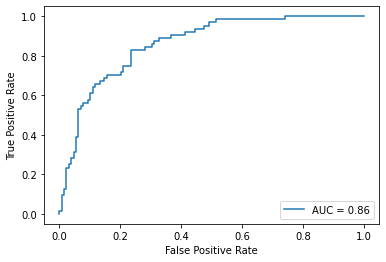

In [34]:
# Plot ROC curve and calculate and calculate AUC metric
fpr, tpr, thresholds = roc_curve(y_test, y_preds_proba[:,1])
auc_score = roc_auc_score(y_test, y_preds_proba[:,1])
plot_roc = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
plot_roc.plot();

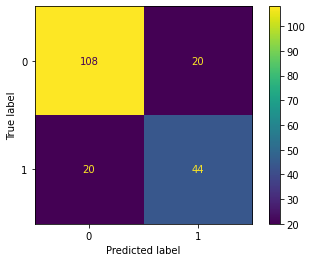

In [35]:
# Plot confusion matrix
confusion_matrix = confusion_matrix(y_test, y_preds)
plot_cm = ConfusionMatrixDisplay(confusion_matrix)
plot_cm.plot();

In [36]:
# Produce classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       128
           1       0.69      0.69      0.69        64

    accuracy                           0.79       192
   macro avg       0.77      0.77      0.77       192
weighted avg       0.79      0.79      0.79       192



# Cross-Validation Evaluation

In [37]:
cross_lg = LogisticRegression(
    max_iter=1000,
    C=29.763514416313132,
    solver='liblinear'
)

cross_score = cross_val_score(
    estimator=cross_lg,
    X=X,
    y=y,
    cv=5,
    scoring='accuracy'
)

np.mean(cross_score)

0.7682794329853154

In [39]:
cross_precision = cross_val_score(
    estimator=cross_lg,
    X=X,
    y=y,
    cv=5,
    scoring='precision'
)

np.mean(cross_precision)

0.715514921861671

In [41]:
cross_recall = cross_val_score(
    estimator=cross_lg,
    X=X,
    y=y,
    cv=5,
    scoring='recall'
)

np.mean(cross_recall)

0.5634521313766597

In [42]:
cross_f1 = cross_val_score(
    estimator=cross_lg,
    X=X,
    y=y,
    cv=5,
    scoring='f1'
)

np.mean(cross_f1)

0.6285835707280624